# Exploratory Data Analysis on Adidas Webstore Shoe Data


In this project, an Exploratory Data Analysis (EDA) has been performed on three datasets related to Adidas shoes, provided on Kaggle, [Adidas Webstore Shoe Data on Kaggle](https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data/data). The primary goal was to combine the datasets and investigate the pricing differences across various countries, focusing on the average price variation by shoe category and country.

The analysis aims to uncover insights into the pricing trends for Adidas shoes, with a specific emphasis on how prices differ based on shoe categories and the countries represented in the datasets. 
By merging the data, I walked through some steps to get to the desired dataset.


In [1]:
import pandas as pd
countries_metrics = pd.read_csv('country_dim.csv')
countries_metrics.drop(columns=['shoe_metric'], inplace=True)
countries_metrics

,country_code,currency
0,DE,euro
1,US,usd
2,BE,euro
3,UK,pounds


Unnecessary columns are dropped from both datasets 'country_dim.csv' and 'shoes_fact.csv', specifically 'shoe_metric', "Unnamed: 0", "availability", "date", and "size". Additionally, cleaning the data for any duplicates and handling of missing values (NaN). Next, we perform a merge on the 'country code' column, and the 'id' column will be used for a subsequent merge with the 'shoes_dim.csv' dataset.

In [3]:
scarpe = pd.read_csv('shoes_fact.csv')
scarpe.drop(columns=["Unnamed: 0", "availability", "date", "size"], inplace=True)
scarpe.head()

,id,price,category,country_code
0,HP9426,60.0,sneakers,DE
1,HP9426,60.0,sneakers,DE
2,HP9426,60.0,sneakers,DE
3,HP9426,60.0,sneakers,DE
4,HP9426,60.0,sneakers,DE


Noticing the large amount of duplicates of the same shoe across different countries and within each state (due to the removal of shoe sizes that are not relevant to the analysis), I have decided to remove the duplicates within each state in order to set up an analysis of the same shoes across different states.

In [6]:
scarpe.id.duplicated()
scarpe = scarpe.drop_duplicates(subset=['id', 'country_code'], keep='first')
scarpe.isnull().sum()
scarpe

,id,price,category,country_code
0,HP9426,60.0,sneakers,DE
20,HQ4199,180.0,sneakers,DE
36,JQ2552,160.0,sneakers,DE
58,JI1896,80.0,sneakers,DE
80,IE8976,180.0,sneakers,DE
...,...,...,...,...
289291,IF4212,144.0,athletic_sneakers,US
289337,IE6438,50.0,athletic_sneakers,US
289456,H02334,110.0,athletic_sneakers,US
291675,IF1360,70.0,occer-shoes,US


In [8]:
scarpe.country_code.unique()
scarpe.duplicated().any()

False

Once the 'shoes_fact.csv' dataset is cleaned, I can perform the merge between the two datasets using the country_code for each shoe item.

## First Merge

In [12]:
countries_metrics_shoes = pd.merge(scarpe, countries_metrics, on='country_code', how="left")
countries_metrics_shoes

,id,price,category,country_code,currency
0,HP9426,60.0,sneakers,DE,euro
1,HQ4199,180.0,sneakers,DE,euro
2,JQ2552,160.0,sneakers,DE,euro
3,JI1896,80.0,sneakers,DE,euro
4,IE8976,180.0,sneakers,DE,euro
...,...,...,...,...,...
3398,IF4212,144.0,athletic_sneakers,US,usd
3399,IE6438,50.0,athletic_sneakers,US,usd
3400,H02334,110.0,athletic_sneakers,US,usd
3401,IF1360,70.0,occer-shoes,US,usd


In order to standardize the data for the analysis, I decide to convert all 'price' data to Euro (therefore converting other currencies such as $ and £ to EUR). However, the original countries of origin for the shoes will be retained (for example, prices in dollars for U.S. shoes will be converted to euros but will still be identified as originating from the United States).

In [15]:
countries_metrics_shoes['currency'].unique()

array(['euro', 'pounds', 'usd'], dtype=object)

In [17]:
def convers_eur(df):
  if df.currency == 'euro':
    return df.price
  elif df.currency == 'usd':
    return df.price * 1.03
  elif df.currency == 'pounds':
    return df.price * 0.85
  else:
    raise ValueError(f"Currency non recognized: {df.currency}")

countries_metrics_shoes['price_EUR'] = countries_metrics_shoes.apply(convers_eur, axis=1)

In [19]:
countries_metrics_shoes.drop(columns=['price', 'currency'], inplace=True)
countries_metrics_shoes.rename(columns={'country_code': 'country'}, inplace=True)
countries_metrics_shoes.isnull().sum()
countries_metrics_shoes

,id,category,country,price_EUR
0,HP9426,sneakers,DE,60.00
1,HQ4199,sneakers,DE,180.00
2,JQ2552,sneakers,DE,160.00
3,JI1896,sneakers,DE,80.00
4,IE8976,sneakers,DE,180.00
...,...,...,...,...
3398,IF4212,athletic_sneakers,US,148.32
3399,IE6438,athletic_sneakers,US,51.50
3400,H02334,athletic_sneakers,US,113.30
3401,IF1360,occer-shoes,US,72.10


Once the shoe prices are converted to Euro for all products, I perform the merge with the 'shoes_dim.csv' file at the shoe ID level, drop unnecessary columns ('best_for_wear', 'image_url', 'sub_color1', 'sub_color2'), and conduct data cleaning/data wrangling.

In [22]:
shoes_info = pd.read_csv('shoes_dim.csv')
shoes_info.drop(columns=['best_for_wear', 'image_url', 'sub_color1', 'sub_color2'], inplace=True)
shoes_info.id.duplicated().any()
shoes_info

,id,name,gender,dominant_color
0,HP9426,Breaknet 2.0 Schuh,U,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,U,Core Black
2,JQ2552,Adizero Boston 12 Laufschuh,U,Cloud White
3,JI1896,NY 90 Schuh,U,Cloud White
4,IE8976,Ultraboost 1.0 Laufschuh,U,Grey One
...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,U,Screaming Orange
3298,IE6438,Run 60s Shoes Kids,K,Cloud White
3299,H02334,NMD_R1 Refined Shoes,K,Cloud White
3300,IF1360,F50 Pro Firm Ground Cleats Kids,K,Turbo


The 'shoes_dim.csv' dataset is grouped by two key variables: id (shoe identifier) and gender. This grouping organizes the data into distinct groups, where each group corresponds to a unique combination of shoe ID and gender.

In [25]:
shoes_info = shoes_info.groupby(['id', 'gender']).agg(
    {
        'name': 'last',   
        'dominant_color': 'first'
    }
).reset_index()

shoes_info['name'] = shoes_info['name'].str.replace('Schuh', 'Shoes')
shoes_info['name'] = shoes_info['name'].str.replace('Laufschuh', 'Shoes')

shoes_info

,id,gender,name,dominant_color
0,011040,U,World Cup Boots,Black
1,015110,U,Copa Mundial Boots,Black
2,019228,U,Mundial Team Boots,Black
3,019310,U,Mundial Goal Shoes,Core Black
4,033200,U,Kaiser 5 Cup Boots,Black
...,...,...,...,...
2108,JS3050,M,Adizero Impact Turf Silver Speed Baseball Shoes,Silver Metallic
2109,JS3083,K,Texas Tech x Mahomes Ultrarun 5 Shoes Kids,Team Power Red 2
2110,JS3222,M,Equipment Edge Runner 1 Shoes,Crystal White
2111,Q47235,M,Tracefinder Trailrunning-Shoes,Core Black


## Second Merge

Once the preparation and cleaning of the source datasets are completed, we can perform the final merge to obtain the dataset for our analysis.
Right now I should be working with a dataset that does not contain duplicates (except for those distinguished by gender and country of origin).

In [29]:
shoes_df = pd.merge(countries_metrics_shoes, shoes_info, on='id', how="inner")
shoes_df

,id,category,country,price_EUR,gender,name,dominant_color
0,HP9426,sneakers,DE,60.00,U,Breaknet 2.0 Shoes,Cloud White
1,HQ4199,sneakers,DE,180.00,M,Ultraboost 1.0 Shoes,Core Black
2,HQ4199,sneakers,DE,180.00,U,ULTRABOOST 1.0 SHOES,Core Black
3,JQ2552,sneakers,DE,160.00,U,Adizero Boston 12 Shoes,Cloud White
4,JI1896,sneakers,DE,80.00,U,NY 90 Shoes,Cloud White
...,...,...,...,...,...,...,...
3675,IF4212,athletic_sneakers,US,148.32,U,Chris Nikic Adizero Boston 12 Wide Shoes,Screaming Orange
3676,IE6438,athletic_sneakers,US,51.50,K,Run 60s Shoes Kids,Cloud White
3677,H02334,athletic_sneakers,US,113.30,K,NMD_R1 Refined Shoes,Cloud White
3678,IF1360,occer-shoes,US,72.10,K,F50 Pro Firm Ground Cleats Kids,Turbo


In [31]:
shoes_df.isnull().sum()
shoes_df.duplicated().any()
shoes_df[shoes_df.duplicated()]

,id,category,country,price_EUR,gender,name,dominant_color


In [33]:
shoes_df.category.value_counts()

category
sneakers                1083
running-shoes            786
us/athletic_sneakers     642
outdoor-shoes            613
tennis-shoes             154
us/soccer-shoes          102
gym_training-shoes        96
us/workout-shoes          58
football-shoes            52
us/walking-shoes          27
us/running-shoes          26
us/tennis-shoes           22
athletic_sneakers          8
us/hiking-shoes            6
walking-shoes              3
occer-shoes                2
Name: count, dtype: int64

**The variable names are stored in a disorganized manner. I will update the 'category' column to accurately reflect the shoe types.**

In [36]:
shoes_df.category.unique()

array(['sneakers', 'football-shoes', 'outdoor-shoes', 'running-shoes',
       'walking-shoes', 'gym_training-shoes', 'tennis-shoes',
       'us/athletic_sneakers', 'us/soccer-shoes', 'us/hiking-shoes',
       'us/running-shoes', 'us/walking-shoes', 'us/workout-shoes',
       'us/tennis-shoes', 'athletic_sneakers', 'occer-shoes'],
      dtype=object)

In [38]:
shoes_df['category'] = shoes_df['category'].replace({
    'occer-shoes' : 'football-shoes',
    'us/tennis-shoes' : 'tennis-shoes',
    'us/running-shoes' : 'running-shoes',
    'us/hiking-shoes' : 'hiking-shoes',
    'us/walking-shoes' : 'walking-shoes',
    'us/workout-shoes' : 'gym_training-shoes',
    'us/soccer-shoes' : 'football-shoes',
    'us/athletic_sneakers' : 'athletic_sneakers'
})

shoes_df.category.value_counts()

category
sneakers              1083
running-shoes          812
athletic_sneakers      650
outdoor-shoes          613
tennis-shoes           176
football-shoes         156
gym_training-shoes     154
walking-shoes           30
hiking-shoes             6
Name: count, dtype: int64

### Distribution of the Target Variable 'Price'

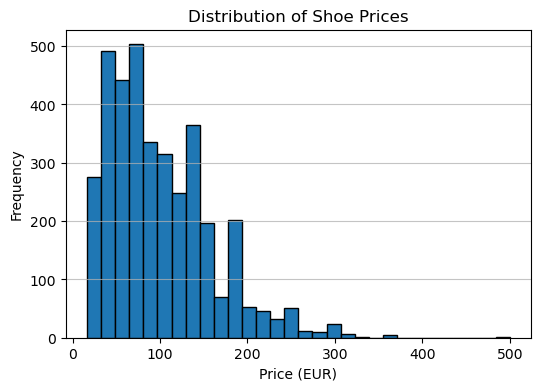

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(shoes_df['price_EUR'], bins = 30, edgecolor = 'black')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')
plt.title('Distribution of Shoe Prices')
plt.grid(axis = 'y', alpha = 0.75)
plt.show()

In [42]:
from scipy.stats.mstats import normaltest
statistic, pvalue = normaltest(shoes_df.price_EUR)
print(f"Test statistic: {statistic}")
print(f"P-value: {pvalue}")
if pvalue < 0.05:
    print("The data does not follow a normal distribution (reject H0).")
else:
    print("The data follows a normal distribution (cannot reject H0).")


Test statistic: 741.6937353489038
P-value: 8.775093201801951e-162
The data does not follow a normal distribution (reject H0).


The variable 'price', as already observed in the graph and later confirmed by the normality test, does not follow a normal distribution and is skewed to the right. Moving forward within the scope of Exploratory Data Analysis (EDA), we aim to visualize how price varies based on different features: specifically, by country and shoe category.
It is worth noting that the 'category' variable in the UK only includes the 'sneakers' instance.

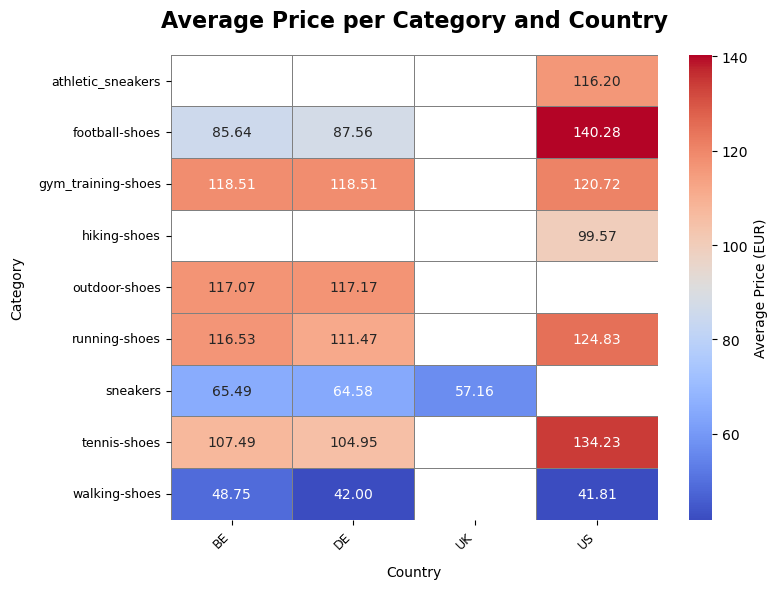

In [45]:
import seaborn as sns

category_country_prices = shoes_df.groupby(['category', 'country'])['price_EUR'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(
    category_country_prices,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Price (EUR)'}
)
plt.title('Average Price per Category and Country', fontsize=16, weight='bold', pad=20) 
plt.xlabel('Country', fontsize=10, labelpad=10) 
plt.ylabel('Category', fontsize=10, labelpad=10) 
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout() 
plt.show()

It is interesting to note that prices tend to be higher in the United States compared to European countries, particularly for football shoes (possibly due to the lower popularity of this sport overseas), and tennis shoes.

From a gender perspective, no significant differences in shoe prices are observed.

In [49]:
'''
category_country_gender = shoes_df.groupby(['category', 'gender'])['price_EUR'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(
    category_country_gender,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Prezzo medio per categoria e genere', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

'\ncategory_country_gender = shoes_df.groupby([\'category\', \'gender\'])[\'price_EUR\'].mean().unstack()\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(\n    category_country_gender,\n    annot=True,\n    fmt=".2f",\n    cmap="coolwarm",\n    cbar=True\n)\nplt.title(\'Prezzo medio per categoria e genere\', fontsize=14)\nplt.xlabel(\'Gender\', fontsize=12)\nplt.ylabel(\'Categoria\', fontsize=12)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n'

**Returning to the previous graph, it would be interesting to examine the price differences of shoes across the various countries present in our dataset.**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

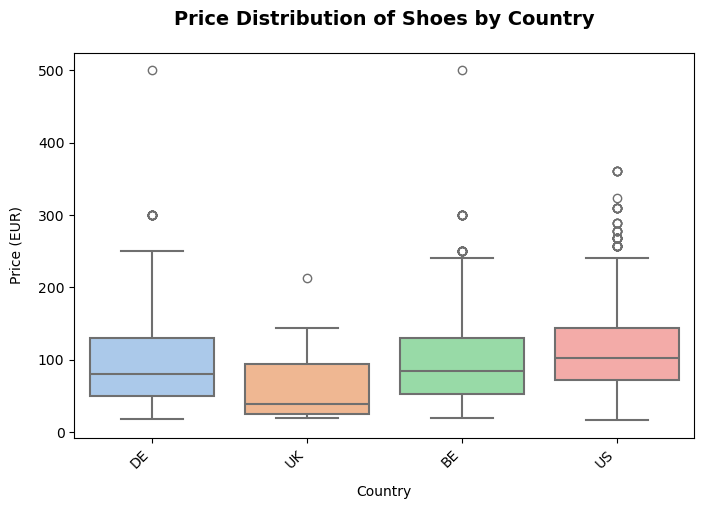

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='country', 
    y='price_EUR', 
    data=shoes_df, 
    palette="pastel",
    hue='country',
    linewidth=1.5,
    legend=False
)

plt.title('Price Distribution of Shoes by Country', fontsize=14, weight='bold', pad=20)
plt.xlabel('Country', fontsize=10, labelpad=10)
plt.ylabel('Price (EUR)', fontsize=10, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

At first glance, it appears that shoe prices in the United States tend to be higher compared to other overseas countries. Notably, the United Kingdom includes only one category of shoes, namely 'sneaker shoes.' Meanwhile, Belgium and Germany exhibit a similar pricing pattern, with outliers distributed relatively homogeneously within their respective trends.

In order to test these hypothesis we can conduct the ANOVA Analysis.

### ANOVA Analysis

The ANOVA (Analysis of Variance) test compares the variability within each group (country) to the variability between the groups. ANOVA will be used to determine whether there are statistically significant differences in the mean shoe prices among the four countries. It If the p-value is below a chosen significance level (0.05), it indicates that at least one country has a mean price that significantly differs from the others. However, it does not specify which countries differ; to see that additional post-hoc will provide for that.

F-statistic: 61.77
P-value: 0.0000
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    BE     DE  -3.2249 0.4827   -9.035   2.5852  False
    BE     UK -41.1833    0.0 -53.5232 -28.8434   True
    BE     US  19.2841    0.0  12.7267  25.8415   True
    DE     UK -37.9583    0.0  -50.173 -25.7437   True
    DE     US  22.5091    0.0  16.1906  28.8276   True
    UK     US  60.4674    0.0  47.8801  73.0547   True
------------------------------------------------------


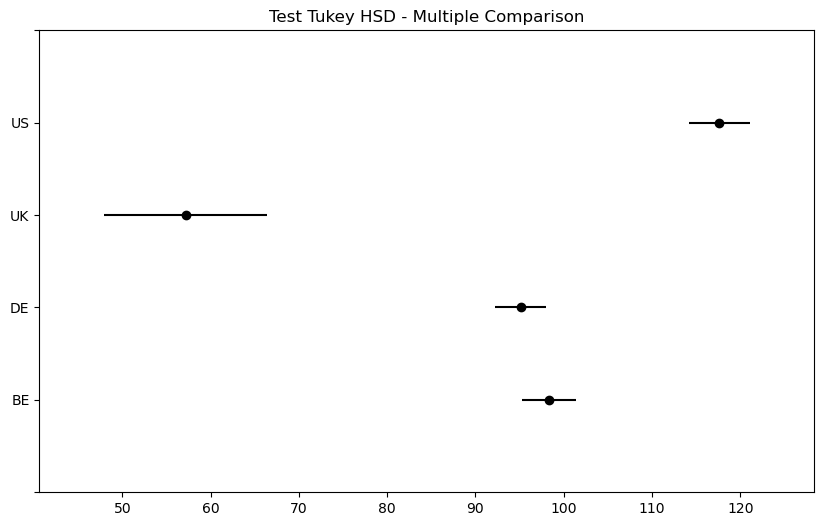

In [61]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
groups = [group['price_EUR'].values for _, group in shoes_df.groupby('country')]
anova_result = f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Test Tukey HSD
tukey = pairwise_tukeyhsd(endog=shoes_df['price_EUR'], groups=shoes_df['country'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title("Test Tukey HSD - Multiple Comparison")
plt.show()

It is important to remember that the UK only had the 'sneakers' category, resulting in lower values compared to the other countries. However, it is particularly interesting to note that, based on the ANOVA test and, subsequently, the Tukey HSD test, no significant differences were found between Belgium and Germany, both of which exhibit similar prices across the reported categories. This is not the case for the United States, which, as shown in the graph and indicated by the p-value from the test, has a higher average shoe price compared to the other countries. As previously observed in the heatmap, this difference is especially pronounced in specific shoe categories.